### Feature Scaling

Suppose we have some sample of data ${\bar{x}^{(1)},\bar{x}^{(2)},\ldots,\bar{x}^{(n)}}$ for some integer $n$ drawn from some natural source.

Typically for all $i =1,2,\ldots,n$, $\bar{x}^{(i)} \in \mathbb{R}^d$ for some $d \in \mathbb{N}$.  

The integer $d$ is the *dimension* of the data.

The $\bar{x}^{(i)}$ might be virtually anything.  Some examples...

* Pictures of cats
* Measurements of shellfish parts
* Measurements of flower parts
* *etc*

We think of the data as being arranged in one large matrix $X$ with $n$ rows and $d$ columns.  The $i$th row of $X$ is the data point $\bar{x}^{(i)}$.  (Because all vectors are column vectors by default, the $i$th row of $X$ is technically $\bar{x}^{(i)T}$, the transpose of $\bar{x}^{(i)}$.)

Usually we have $n >> d$ and the matrix $X$ is "tall and skinny".

Below an example is given of a matrix which has $n=40$ and $d=2$.

In the example $X$ is made up of artificial data.  

The columns of $X$ are called *features*.  For example suppose the $\bar{x}^{(i)}$ are triples of real numbers representing the *radius*,*weight* and *color* of a metal sphere.  Then the columns of $X$ would refer to the *radius*,*weight* and *color* of the spheres, respectively, and the "features" of the data would be *radius*, *weight* and *color*. 

Often features are naturally on different scales.  For example if the metal balls are made of some very light substance and radius is measured in **cm** but weight is measured in **kg** it might happen that the numbers in the `weight` column are thousands of times smaller than the numbers in the `radius` column.

For many (but not all) machine learning algorithms, this mismatch of scale makes problems.  

Therefore we are interested in ways to do **feature scaling**.  This means transforming $X$ so that all of the columns are on the same scale.  

In the example below, notice that in its raw form, $X$ is quite skinny and tall.  We want to scale the features so that it becomes more "roundish". (Here we are talking about the scatterplot of the data, not the dimensions of the matrix.)

In the notebook below we explore four methods for doing feature scaling.  All are explained in this Wikipedia article on [feature scaling](https://en.wikipedia.org/wiki/Feature_scaling).

We have written a plotting method for you called `plotX` which will use `matplotlib` to create an image of $X$ which visually shows differences in scale among features. 

The first method (min-max scaling) has been done for you.

Your job is to implement the remaining three, as described in the Wikipedia article.  Note that the notation of $\bar{x}^{(i)}$ representing a *row* is not the same as the Wikipedia notation. 

The correct outputs are also given below.  In case they are overwritten as you work, you can find an HTML version in this directory.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

np.random.seed(42)

col1 = np.random.randint(10,size=40)
col2 = np.random.randint(100,size=40)
X = np.c_[col1,col2]

X[:5]  ## first 5 data points

array([[ 6, 88],
       [ 3, 59],
       [ 7, 13],
       [ 4,  8],
       [ 6, 89]])

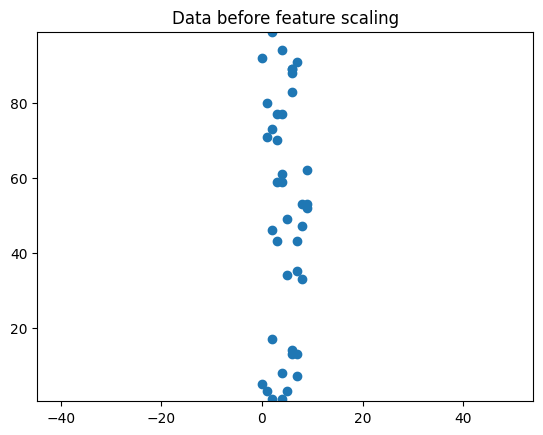

In [2]:
import matplotlib.pyplot as plt
def plotX(X,title):
    plt.scatter(X[:,0],X[:,1])
    plt.title(title)
    center = X.mean(axis=0)
    maxC = (X-center).max()
    plt.xlim([center[0]-maxC,center[0]+maxC])
    plt.ylim([center[1]-maxC,center[1]+maxC])
    plt.show()
plotX(X,"Data before feature scaling")

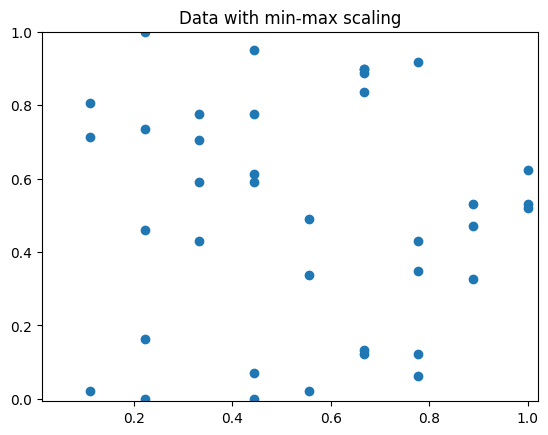

First 10 rows of X with min-max scaling...
[[0.66666667 0.8877551 ]
 [0.33333333 0.59183673]
 [0.77777778 0.12244898]
 [0.44444444 0.07142857]
 [0.66666667 0.89795918]
 [1.         0.52040816]
 [0.22222222 0.        ]
 [0.66666667 0.83673469]
 [0.77777778 0.91836735]
 [0.44444444 0.59183673]]


In [3]:
mins=X.min(axis=0)    
maxs=X.max(axis=0)
difference = maxs-mins
X_minmax=(X-mins)/difference
plotX(X_minmax,"Data with min-max scaling")
print("First 10 rows of X with min-max scaling...")
print(X_minmax[:10])

[[ 0.15        0.39107143]
 [-0.18333333  0.09515306]
 [ 0.26111111 -0.37423469]
 [-0.07222222 -0.4252551 ]
 [ 0.15        0.40127551]
 [ 0.48333333  0.02372449]
 [-0.29444444 -0.49668367]
 [ 0.15        0.34005102]
 [ 0.26111111  0.42168367]
 [-0.07222222  0.09515306]]


<AxesSubplot:title={'center':'meannorm'}, xlabel='A', ylabel='B'>

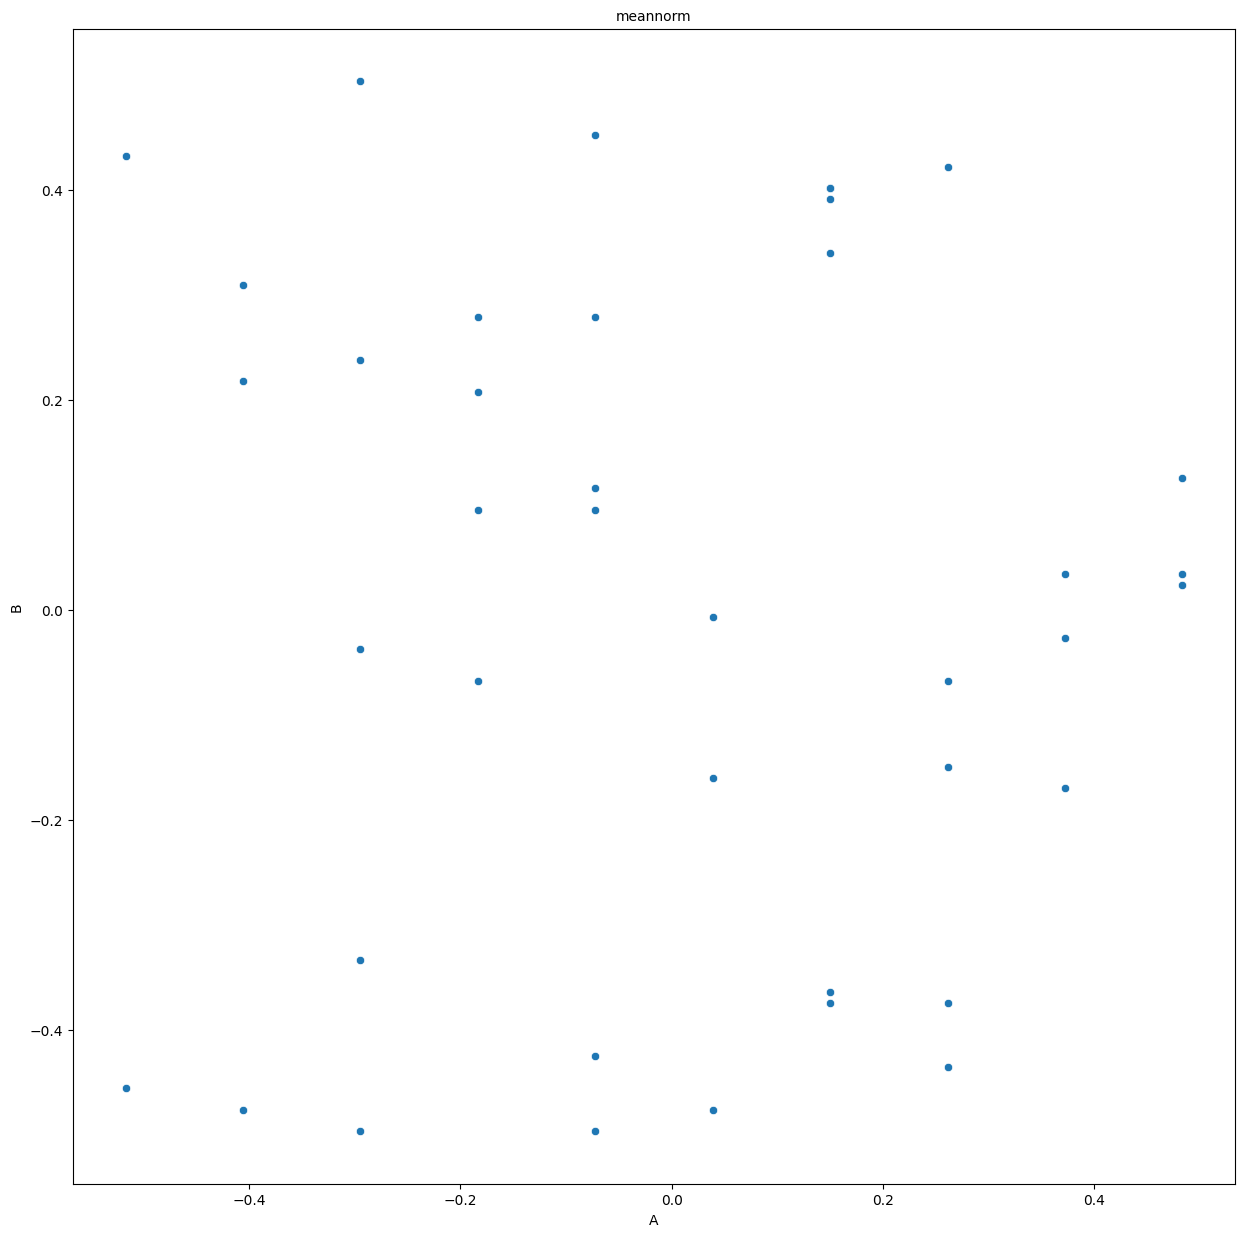

In [4]:
mins=X.min(axis=0)    
maxs=X.max(axis=0)
means = X.mean(axis=0)
difference = maxs-mins
X_meanNorm= (X - means)/(maxs-mins)
print(X_meanNorm[:10])

df = pd.DataFrame(X_meanNorm,columns=['A','B'])
plt.figure(figsize=(15,15))
plt.title('meannorm',size=10)
sns.scatterplot(data = df,x = 'A',y='B')



[[ 0.52839698  1.23685716]
 [-0.64581853  0.30094437]
 [ 0.91980215 -1.18360695]
 [-0.25441336 -1.34497122]
 [ 0.52839698  1.26913001]
 [ 1.7026125   0.07503439]
 [-1.0372237  -1.5708812 ]
 [ 0.52839698  1.07549288]
 [ 0.91980215  1.33367572]
 [-0.25441336  0.30094437]]


<AxesSubplot:title={'center':'Z score'}, xlabel='A', ylabel='B'>

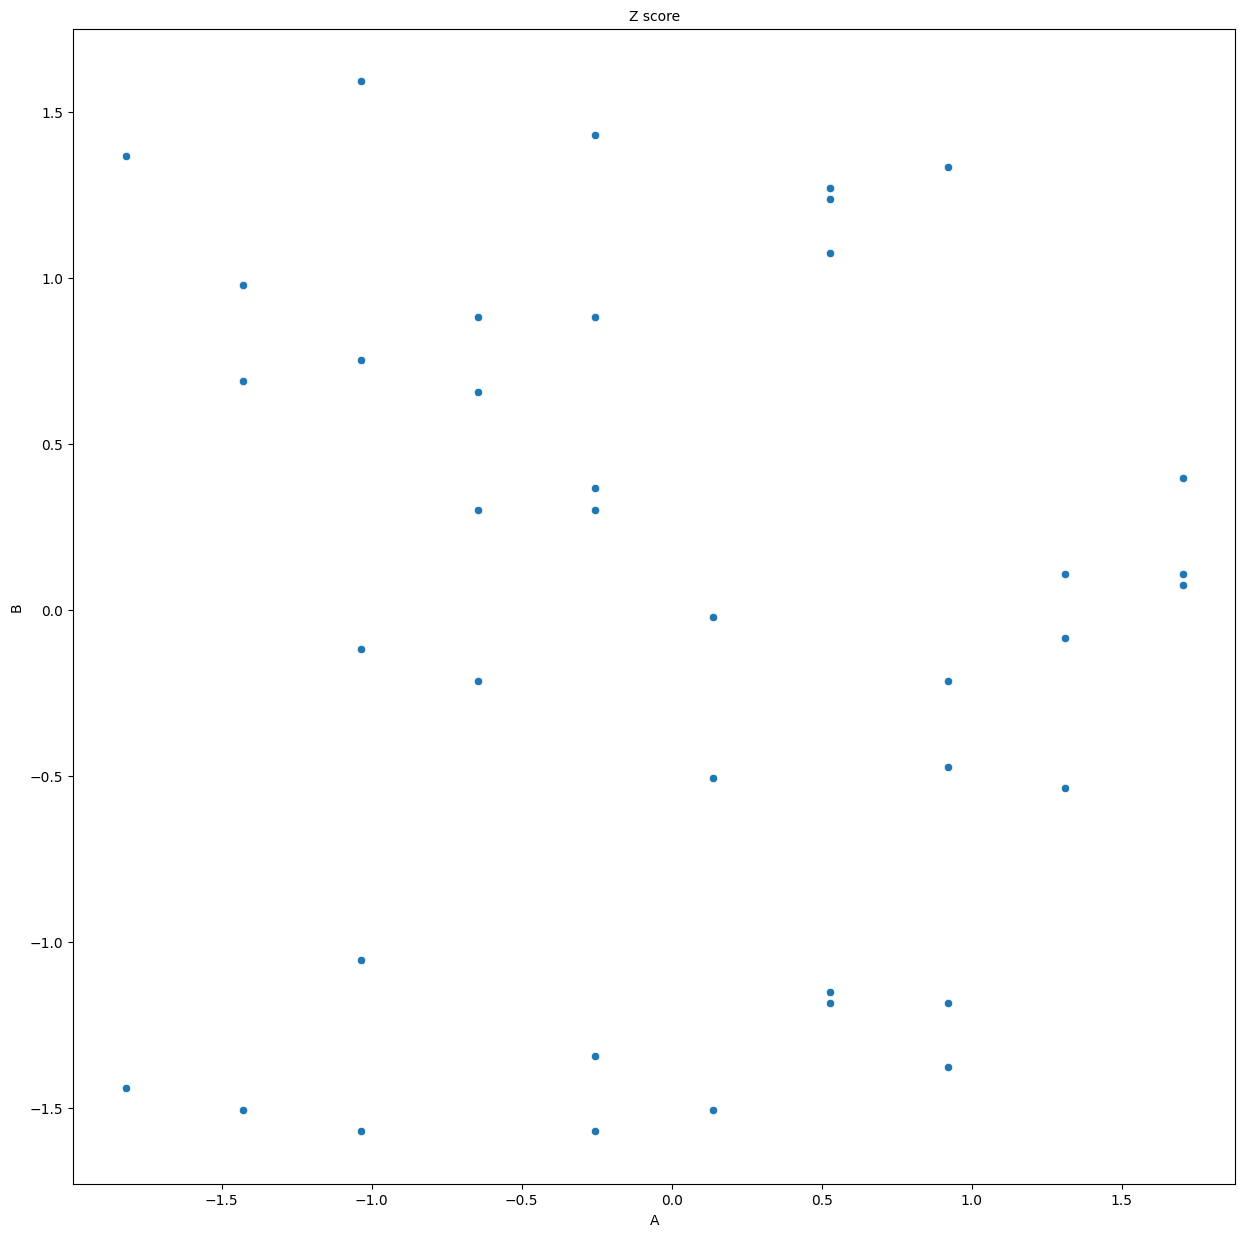

In [5]:
mins=X.min(axis=0)    
maxs=X.max(axis=0)
means = X.mean(axis=0)
difference = maxs-mins
stds = X.std(axis=0)
X_zscore=(X-means)/stds
print(X_zscore[:10])

df = pd.DataFrame(X_zscore,columns=['A','B'])
plt.figure(figsize=(15,15))
plt.title('Z score',size=10)
sns.scatterplot(data = df,x = 'A',y='B')


[[0.01613772 0.2366866 ]
 [0.00806886 0.1586876 ]
 [0.01882734 0.03496507]
 [0.01075848 0.02151696]
 [0.01613772 0.23937622]
 [0.02420658 0.13986026]
 [0.00537924 0.00268962]
 [0.01613772 0.22323849]
 [0.01882734 0.24475546]
 [0.01075848 0.1586876 ]]


<AxesSubplot:title={'center':'unitnorm'}, xlabel='A', ylabel='B'>

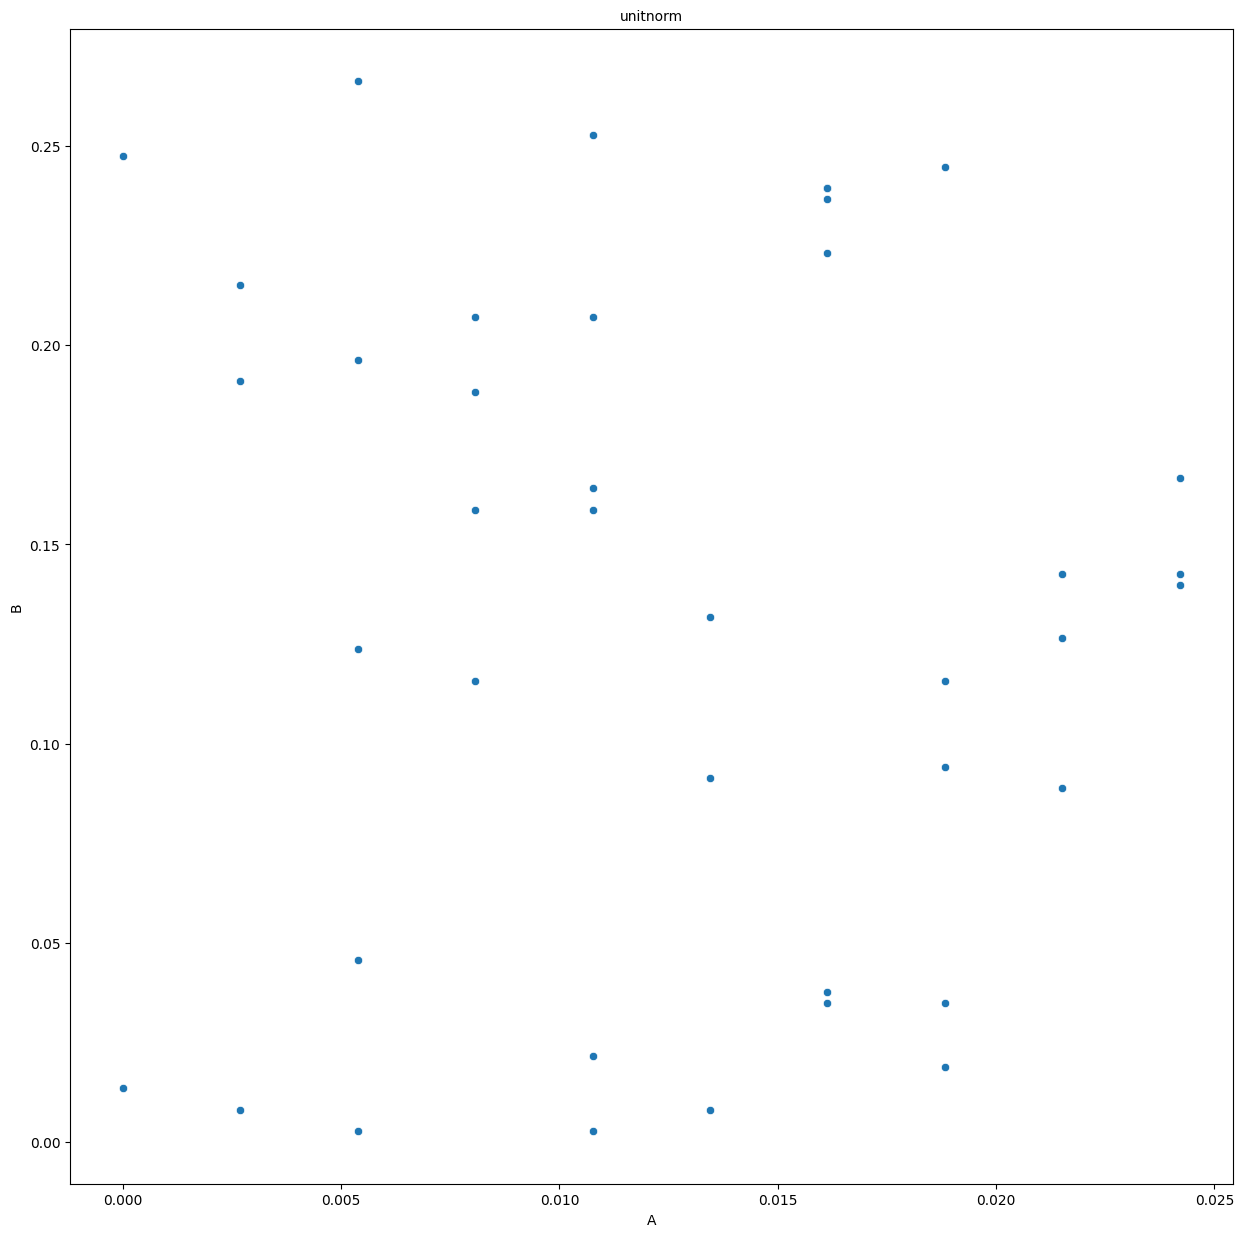

In [6]:
sp = X / np.linalg.norm(X)
print(sp[:10])

df = pd.DataFrame(sp,columns=['A','B'])
plt.figure(figsize=(15,15))
plt.title('unitnorm',size=10)
sns.scatterplot(data = df,x = 'A',y='B')




In [9]:
np.linalg.norm(X,axis=0)

array([ 33.55592347, 370.28232472])